In [1]:
import pandas as pd

In [2]:
df_train = pd.read_pickle("./df_train_W_meta_metrics.pkl")
df_train

,nodes,edges,ratio_n_m,ratio_m_n,density,min_degree,max_degree,mean_degree,median_degree,q0.25_degree,...,entropy_degree,normalized_min_clique_size,normalized_max_clique_size,normalized_median_clique_size,normalized_q0.25_clique_size,normalized_q0.75_clique_size,normalized_variation_coefficient_clique_size,normalized_entropy_clique_size,target_time,target_space
0,19,11,1.727273,0.578947,0.064327,0,3,1.157895,1.0,0.0,...,1.871019,0.052632,0.157895,0.052632,0.052632,0.105263,0.397478,0.059110,dfs,dfs
1,34,130,0.261538,3.823529,0.231729,3,12,7.647059,7.0,6.0,...,3.051602,0.029412,0.117647,0.058824,0.058824,0.088235,0.324626,0.046827,best_first_search,best_first_search
2,68,364,0.186813,5.352941,0.159789,3,18,10.705882,11.0,9.0,...,3.374558,0.014706,0.058824,0.029412,0.029412,0.044118,0.301528,0.022069,best_first_search,best_first_search
3,58,122,0.475410,2.103448,0.073805,1,10,4.206897,4.0,3.0,...,2.907696,0.017241,0.051724,0.034483,0.017241,0.034483,0.319693,0.020953,best_first_search,astar
4,96,131,0.732824,1.364583,0.028728,0,9,2.729167,2.0,1.0,...,2.686679,0.010417,0.031250,0.020833,0.010417,0.020833,0.330712,0.011580,bidirectional_search,bidirectional_search
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,25,2,12.500000,0.080000,0.006667,0,1,0.160000,0.0,0.0,...,0.634310,0.040000,0.080000,0.040000,0.040000,0.040000,0.248475,0.015238,randomized_shortest_path,randomized_shortest_path
4496,98,202,0.485149,2.061224,0.042499,0,12,4.122449,4.0,3.0,...,3.017961,0.010204,0.030612,0.020408,0.010204,0.020408,0.305481,0.011343,bidirectional_search,best_first_search
4497,51,71,0.718310,1.392157,0.055686,0,6,2.784314,3.0,2.0,...,2.478563,0.019608,0.039216,0.039216,0.019608,0.039216,0.313072,0.019226,dfs,best_first_search
4498,137,1547,0.088559,11.291971,0.166058,12,33,22.583942,23.0,19.0,...,4.022536,0.007299,0.036496,0.021898,0.014599,0.021898,0.261367,0.010864,best_first_search,astar


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nodes                                         4500 non-null   int64  
 1   edges                                         4500 non-null   int64  
 2   ratio_n_m                                     4500 non-null   float64
 3   ratio_m_n                                     4500 non-null   float64
 4   density                                       4500 non-null   float64
 5   min_degree                                    4500 non-null   int64  
 6   max_degree                                    4500 non-null   int64  
 7   mean_degree                                   4500 non-null   float64
 8   median_degree                                 4500 non-null   float64
 9   q0.25_degree                                  4500 non-null   f

Encode labels

In [4]:
found_labels_in_df = df_train.iloc[:, 20].squeeze().unique().tolist()
print("Found labels:", found_labels_in_df)

encoder_labels = {x:i for i,x in enumerate(found_labels_in_df)}

df_train.replace({"target_time": encoder_labels}, inplace=True)

df_train.head()

Found labels: ['dfs', 'best_first_search', 'bidirectional_search', 'bfs', 'dijkstra', 'randomized_shortest_path', 'astar']


,nodes,edges,ratio_n_m,ratio_m_n,density,min_degree,max_degree,mean_degree,median_degree,q0.25_degree,...,entropy_degree,normalized_min_clique_size,normalized_max_clique_size,normalized_median_clique_size,normalized_q0.25_clique_size,normalized_q0.75_clique_size,normalized_variation_coefficient_clique_size,normalized_entropy_clique_size,target_time,target_space
0,19,11,1.727273,0.578947,0.064327,0,3,1.157895,1.0,0.0,...,1.871019,0.052632,0.157895,0.052632,0.052632,0.105263,0.397478,0.059110,0,dfs
1,34,130,0.261538,3.823529,0.231729,3,12,7.647059,7.0,6.0,...,3.051602,0.029412,0.117647,0.058824,0.058824,0.088235,0.324626,0.046827,1,best_first_search
2,68,364,0.186813,5.352941,0.159789,3,18,10.705882,11.0,9.0,...,3.374558,0.014706,0.058824,0.029412,0.029412,0.044118,0.301528,0.022069,1,best_first_search
3,58,122,0.475410,2.103448,0.073805,1,10,4.206897,4.0,3.0,...,2.907696,0.017241,0.051724,0.034483,0.017241,0.034483,0.319693,0.020953,1,astar
4,96,131,0.732824,1.364583,0.028728,0,9,2.729167,2.0,1.0,...,2.686679,0.010417,0.031250,0.020833,0.010417,0.020833,0.330712,0.011580,2,bidirectional_search


In [5]:
print(len(df_train))
df_train.dropna(inplace=True)
print(len(df_train))

4500
4500


In [6]:
X_train =df_train.iloc[:,:20].to_numpy()
y_train = df_train.iloc[:,20]

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', k_neighbors=5)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, y_train)

c:\Users\Massimiliano Pascoli\miniconda3\envs\opti_alg_sel\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Massimiliano Pascoli\miniconda3\envs\opti_alg_sel\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Massimiliano Pascoli\miniconda3\envs\opti_alg_sel\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Massimiliano Pascoli\miniconda3\envs\opti_alg_sel\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will

In [8]:
X_train_smote.shape

(21413, 20)

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfclassif=RandomForestClassifier(n_estimators=200,criterion="log_loss",max_depth=20, bootstrap=True, n_jobs=4)
rfclassif.fit(X_train_smote, Y_train_smote)

c:\Users\Massimiliano Pascoli\miniconda3\envs\opti_alg_sel\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Massimiliano Pascoli\miniconda3\envs\opti_alg_sel\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


RandomForestClassifier(criterion='log_loss', max_depth=20, n_estimators=200,
                       n_jobs=4)

## Test

In [10]:
test_df = pd.read_pickle("./df_test_W_meta_metrics.pkl")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nodes                                         500 non-null    int64  
 1   edges                                         500 non-null    int64  
 2   ratio_n_m                                     500 non-null    float64
 3   ratio_m_n                                     500 non-null    float64
 4   density                                       500 non-null    float64
 5   min_degree                                    500 non-null    int64  
 6   max_degree                                    500 non-null    int64  
 7   mean_degree                                   500 non-null    float64
 8   median_degree                                 500 non-null    float64
 9   q0.25_degree                                  500 non-null    flo

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nodes                                         500 non-null    int64  
 1   edges                                         500 non-null    int64  
 2   ratio_n_m                                     500 non-null    float64
 3   ratio_m_n                                     500 non-null    float64
 4   density                                       500 non-null    float64
 5   min_degree                                    500 non-null    int64  
 6   max_degree                                    500 non-null    int64  
 7   mean_degree                                   500 non-null    float64
 8   median_degree                                 500 non-null    float64
 9   q0.25_degree                                  500 non-null    flo

In [12]:
found_labels_in_df = test_df.iloc[:, 20].squeeze().unique().tolist()
print("Found labels:", found_labels_in_df)

Found labels: ['best_first_search', 'bidirectional_search', 'dfs', 'dijkstra', 'bfs', 'randomized_shortest_path']


In [13]:
test_df.replace({"target_time":encoder_labels}, inplace=True)
test_df.head()

,nodes,edges,ratio_n_m,ratio_m_n,density,min_degree,max_degree,mean_degree,median_degree,q0.25_degree,...,entropy_degree,normalized_min_clique_size,normalized_max_clique_size,normalized_median_clique_size,normalized_q0.25_clique_size,normalized_q0.75_clique_size,normalized_variation_coefficient_clique_size,normalized_entropy_clique_size,target_time,target_space
0,41,85,0.482353,2.073171,0.103659,1,10,4.146341,4.0,3.0,...,2.737474,0.024390,0.073171,0.048780,0.024390,0.048780,0.329137,0.031053,1,best_first_search
1,31,52,0.596154,1.677419,0.111828,1,6,3.354839,3.0,2.0,...,2.543065,0.032258,0.096774,0.064516,0.032258,0.064516,0.350882,0.042649,1,best_first_search
2,30,83,0.361446,2.766667,0.190805,2,10,5.533333,5.5,4.0,...,2.806239,0.033333,0.100000,0.066667,0.066667,0.066667,0.322118,0.045542,2,best_first_search
3,187,3046,0.061392,16.288770,0.175148,21,46,32.577540,33.0,29.5,...,4.143077,0.005348,0.026738,0.016043,0.010695,0.016043,0.246461,0.008123,1,randomized_shortest_path
4,105,141,0.744681,1.342857,0.025824,0,9,2.685714,2.0,1.0,...,2.702194,0.009524,0.028571,0.019048,0.009524,0.019048,0.330766,0.010532,2,bidirectional_search


In [14]:
print(len(test_df))
test_df.dropna(inplace=True)
print(len(test_df))

500
500


In [15]:
y_tilde = rfclassif.predict(test_df.iloc[:,0:20].to_numpy())

In [16]:
y = test_df.iloc[:,20]

In [17]:
acc=sum([1 for x,y in zip(y_tilde, y) if x==y])/len(y)
print(f"Accuracy: {acc*100}%")

Accuracy: 70.0%


c:\Users\Massimiliano Pascoli\miniconda3\envs\opti_alg_sel\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Massimiliano Pascoli\miniconda3\envs\opti_alg_sel\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Massimiliano Pascoli\miniconda3\envs\opti_alg_sel\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Massimiliano Pascoli\miniconda3\envs\opti_alg_sel\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will

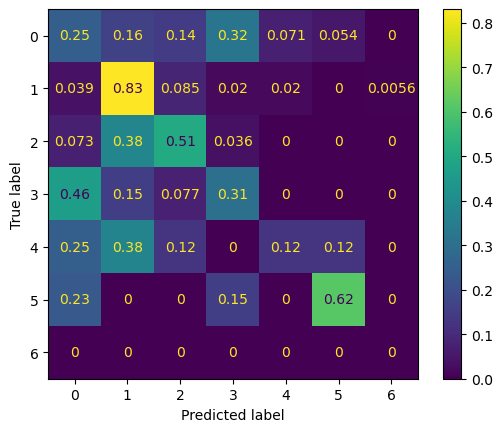

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

c_mat=confusion_matrix(y,y_tilde, normalize="true")
disp=ConfusionMatrixDisplay(c_mat)
disp.plot()

In [19]:
from sklearn.metrics import f1_score

f1_s = f1_score(y, y_tilde, average="weighted")
print("F1-Score:", f1_s*100)

F1-Score: 71.6052654335539


c:\Users\Massimiliano Pascoli\miniconda3\envs\opti_alg_sel\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Massimiliano Pascoli\miniconda3\envs\opti_alg_sel\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Massimiliano Pascoli\miniconda3\envs\opti_alg_sel\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Massimiliano Pascoli\miniconda3\envs\opti_alg_sel\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will

In [20]:
import pickle
from datetime import datetime as dt
ts = dt.now().strftime("%Y-%m-%d-%H-%M")
print(ts)
with open(f"./models/{ts}_{int(f1_s*100)}f1_random_forest_.pkl", mode="wb") as f:
    pickle.dump(rfclassif, f)

2023-12-15-14-15
